In [1]:
import pandas as pd
import numpy as np

In [2]:
bee_df = pd.read_csv('data/NASS_Bee-Colony_2015-2021.csv')
bee_df.head()

,State,Starting Colonies,Maximum Colonies,Lost Colonies,Percent Loss,Added Colonies,Renovated Colonies,Percent Renovated,Year
0,Alabama,7000,7000,1800,26,2800,250,4,2015-Q1
1,Arizona,35000,35000,4600,13,3400,2100,6,2015-Q1
2,Arkansas,13000,14000,1500,11,1200,90,1,2015-Q1
3,California,1440000,1690000,255000,15,250000,124000,7,2015-Q1
4,Colorado,3500,12500,1500,12,200,140,1,2015-Q1


In [17]:
bee_df.dtypes

State                         object
Starting Colonies             object
Maximum Colonies              object
Lost Colonies                 object
Percent Loss                  object
Added Colonies                object
Renovated Colonies            object
Percent Renovated             object
Year                          object
date                  datetime64[ns]
dtype: object

In [4]:
bee_df.describe()

,State,Starting Colonies,Maximum Colonies,Lost Colonies,Percent Loss,Added Colonies,Renovated Colonies,Percent Renovated,Year
count,1222,1222,1222,1222,1222,1222,1222,1222,1222
unique,47,290,281,262,46,260,255,54,26
top,Alabama,(NA),(NA),(NA),8,(NA),0,1,2015-Q1
freq,26,47,47,47,93,47,87,144,47


In [5]:
print('Total', len(bee_df))

na_counts = bee_df.isna().sum()
print(na_counts.sort_values())

Total 1222
State                 0
Starting Colonies     0
Maximum Colonies      0
Lost Colonies         0
Percent Loss          0
Added Colonies        0
Renovated Colonies    0
Percent Renovated     0
Year                  0
dtype: int64


In [6]:
bee_df['date'] = pd.PeriodIndex(bee_df['Year'], freq='Q').to_timestamp()

In [7]:
bee_df

,State,Starting Colonies,Maximum Colonies,Lost Colonies,Percent Loss,Added Colonies,Renovated Colonies,Percent Renovated,Year,date
0,Alabama,7000,7000,1800,26,2800,250,4,2015-Q1,2015-01-01
1,Arizona,35000,35000,4600,13,3400,2100,6,2015-Q1,2015-01-01
2,Arkansas,13000,14000,1500,11,1200,90,1,2015-Q1,2015-01-01
3,California,1440000,1690000,255000,15,250000,124000,7,2015-Q1,2015-01-01
4,Colorado,3500,12500,1500,12,200,140,1,2015-Q1,2015-01-01
...,...,...,...,...,...,...,...,...,...,...
1217,West Virginia,8000,9000,170,2,1900,390,4,2021-Q2,2021-04-01
1218,Wisconsin,42000,57000,2200,4,9000,7500,13,2021-Q2,2021-04-01
1219,Wyoming,13500,30000,3400,11,7500,4900,16,2021-Q2,2021-04-01
1220,Other,5970,8410,140,2,2890,3100,37,2021-Q2,2021-04-01


In [8]:
bee_df['Starting Colonies'].describe()

count     1222
unique     290
top       (NA)
freq        47
Name: Starting Colonies, dtype: object

In [9]:
bee_df['Added Colonies'].describe()

count     1222
unique     260
top       (NA)
freq        47
Name: Added Colonies, dtype: object

In [10]:
bee_df['Renovated Colonies'].describe()

count     1222
unique     255
top          0
freq        87
Name: Renovated Colonies, dtype: object

In [11]:
bee_df['Maximum Colonies'].describe()

count     1222
unique     281
top       (NA)
freq        47
Name: Maximum Colonies, dtype: object

In [12]:
bee_df['Year'].value_counts()

2015-Q1    47
2015-Q2    47
2021-Q1    47
2020-Q4    47
2020-Q3    47
2020-Q2    47
2020-Q1    47
2019-Q4    47
2019-Q3    47
2019-Q2    47
2019-Q1    47
2018-Q4    47
2018-Q3    47
2018-Q2    47
2018-Q1    47
2017-Q4    47
2017-Q3    47
2017-Q2    47
2017-Q1    47
2016-Q4    47
2016-Q3    47
2016-Q2    47
2016-Q1    47
2015-Q4    47
2015-Q3    47
2021-Q2    47
Name: Year, dtype: int64

In [54]:
california_bees_df = bee_df[bee_df['State'] == 'California']
spring_cali_bees_df = california_bees_df[california_bees_df['date'].dt.month == 4]

In [62]:
RELATIONSHIPS = [
    ('date', 'Starting Colonies'),
    ('date', 'Lost Colonies'),
    ('date', 'Percent Loss'),
    ('date', 'Renovated Colonies'),
    ('date', 'Maximum Colonies')
]

SELECT = (0, 4)

relational_dfs = {}
for i in range(SELECT[0], SELECT[1]+1):
    colA, colB = RELATIONSHIPS[i]
    new_df = bee_df[bee_df['State'] == 'California'][[colA, colB]]
    new_df = new_df[new_df['date'].dt.month == 7]
    new_df[colB] = pd.to_numeric(new_df[colB], errors='coerce')
    relational_dfs[f'{colA}_vs_{colB}'] = new_df

In [63]:
relational_dfs

{'date_vs_Starting Colonies':            date  Starting Colonies
 97   2015-07-01             730000
 285  2016-07-01             740000
 473  2017-07-01             590000
 661  2018-07-01             590000
 849  2019-07-01             650000
 1037 2020-07-01             640000,
 'date_vs_Lost Colonies':            date  Lost Colonies
 97   2015-07-01          76000
 285  2016-07-01          82000
 473  2017-07-01          67000
 661  2018-07-01          73000
 849  2019-07-01          93000
 1037 2020-07-01          69000,
 'date_vs_Percent Loss':            date  Percent Loss
 97   2015-07-01            10
 285  2016-07-01            10
 473  2017-07-01            10
 661  2018-07-01            10
 849  2019-07-01            13
 1037 2020-07-01            10,
 'date_vs_Renovated Colonies':            date  Renovated Colonies
 97   2015-07-01               93000
 285  2016-07-01               78000
 473  2017-07-01               74000
 661  2018-07-01              141000
 849  2019-

<AxesSubplot:xlabel='date'>

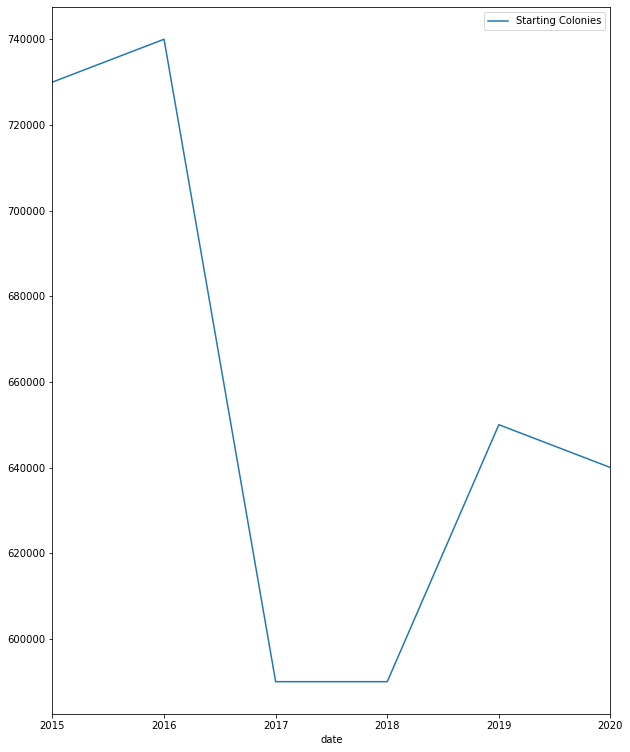

In [65]:
relational_dfs['date_vs_Starting Colonies'].plot.line(x='date', 
                                y='Starting Colonies',
                               figsize=(10, 13))

In [19]:
pd.to_numeric(bee_df['Starting Colonies'], errors='coerce')

0          7000.0
1         35000.0
2         13000.0
3       1440000.0
4          3500.0
          ...    
1217       8000.0
1218      42000.0
1219      13500.0
1220       5970.0
1221    2855070.0
Name: Starting Colonies, Length: 1222, dtype: float64